# Crimes analysis of San Francisco and Seattle by Visualization
### S. Schiavinato

This notebook contains an analysis of the crimes of San Fransisco and Seattle, with some cross city features, by means of data visualization. All the code is reproducible with Jupypter v4.0.6, Python v3.5, Pandas v0.18.0 and Seaborn v0.7.0 (and the corresponding dependencies). For this you can install [Anaconda](https://www.continuum.io/downloads)

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from ipywidgets import interact
%matplotlib inline

# Plot visual parameters
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["figure.figsize"] = (8*(1+np.sqrt(5))/2,8)

C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## San Francisco
The data is imported with the pandas library. The next output show a brief of the dataframe, and the first 3 rows for some insight of the raw data

In [2]:
raw_data_sf = pd.read_csv("./sanfrancisco_incidents_summer_2014.csv")
raw_data_sf.info()
raw_data_sf.iloc[:3,:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28993 entries, 0 to 28992
Data columns (total 13 columns):
IncidntNum    28993 non-null int64
Category      28993 non-null object
Descript      28993 non-null object
DayOfWeek     28993 non-null object
Date          28993 non-null object
Time          28993 non-null object
PdDistrict    28993 non-null object
Resolution    28993 non-null object
Address       28993 non-null object
X             28993 non-null float64
Y             28993 non-null float64
Location      28993 non-null object
PdId          28993 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 2.9+ MB


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244


The variable for this analysis will be __sf__, which is a dataframe with PdDistrict and Category as categorical types (because these features are Nominal) and Timestamp with the actual timestamp of the crime (with type datetime64 for custom search). The IncidntNum and PdId are droped; these are Ordinal values with no meaning for this analysis.

In [258]:
sf = raw_data_sf.copy()
sf.Category = sf.Category.astype("category")
sf.PdDistrict = sf.PdDistrict.astype("category")

sf["Timestamp"] = pd.to_datetime(sf.Date + " " + sf.Time)
sf["HourDay"] = sf.Timestamp.dt.hour
sf.drop(["IncidntNum"], axis=1, inplace=True)
print(sf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28993 entries, 0 to 28992
Data columns (total 14 columns):
Category      28993 non-null category
Descript      28993 non-null object
DayOfWeek     28993 non-null object
Date          28993 non-null object
Time          28993 non-null object
PdDistrict    28993 non-null category
Resolution    28993 non-null object
Address       28993 non-null object
X             28993 non-null float64
Y             28993 non-null float64
Location      28993 non-null object
PdId          28993 non-null int64
Timestamp     28993 non-null datetime64[ns]
HourDay       28993 non-null int64
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 2.7+ MB
None


### Count of crimes by type
With the data clean ready for plotting, the first visualization to be shown is the count of the crimes by type of crimes.

C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


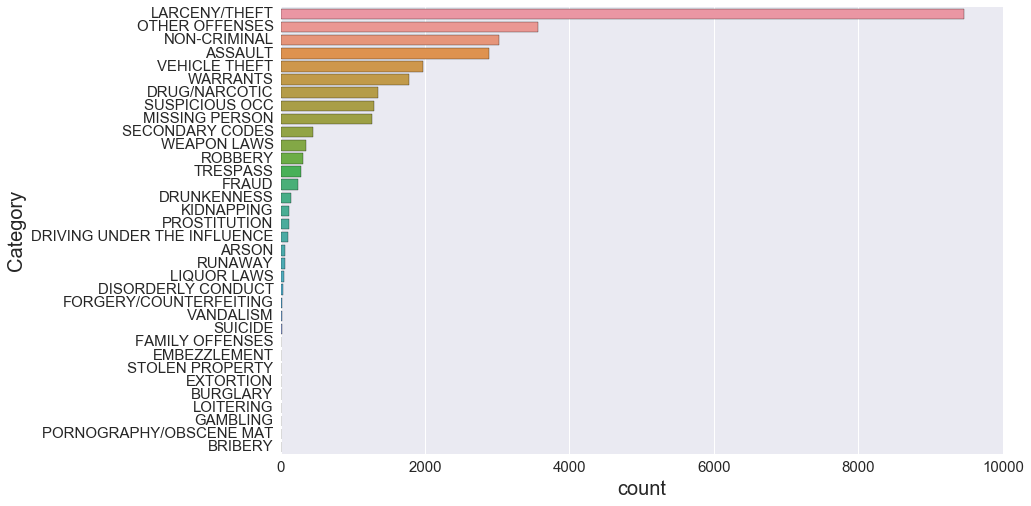

In [261]:
sns.set_palette(sns.color_palette("pastel"))
ordVal = sf.groupby("Category")["PdId"].describe().unstack().sort_values(by=["count"], ascending=False).index.values
sns.countplot(data=sf, y="Category", order=ordVal);

As expected, LARCENY/THEFT is the most commont tpye of crimes, by a clear margin. Then OTHER OFFENCES (which is a vague category), NON-CRIMINAL and the fourth category is ASSAULT. The amount of ASSAULT crimes shows that San Francisco has an important amount violent crimes.

### Count of crimes by time period

#### Hour of the day

C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


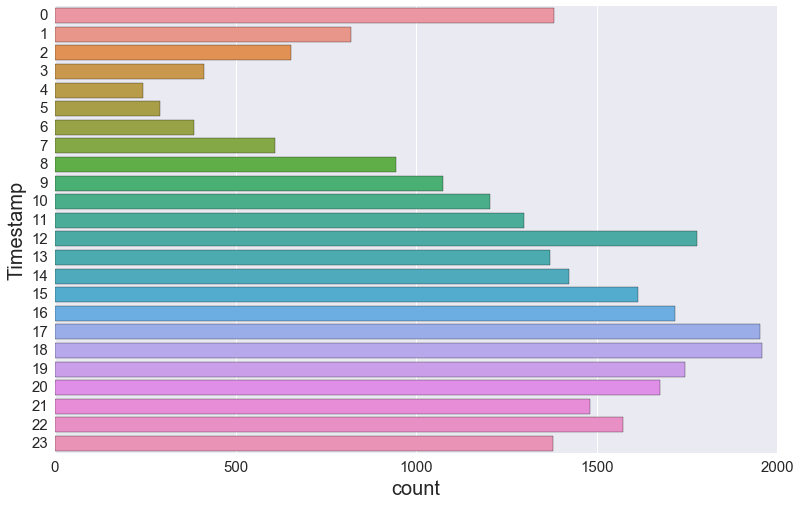

In [185]:
sns.set_palette(sns.color_palette("pastel"))
sns.countplot(y=sf.Timestamp.dt.hour, order=range(0,24));

#### Hour of day and category of crime
The last plot can have a stacked form, with the count by category. The categories with less than 10 crimes in one hour are ploted in another graphic, for the sake of understanding

C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


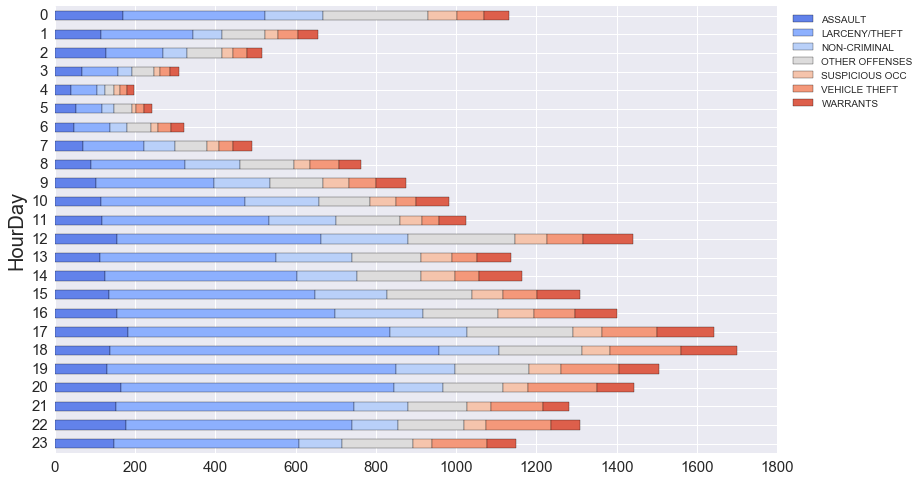

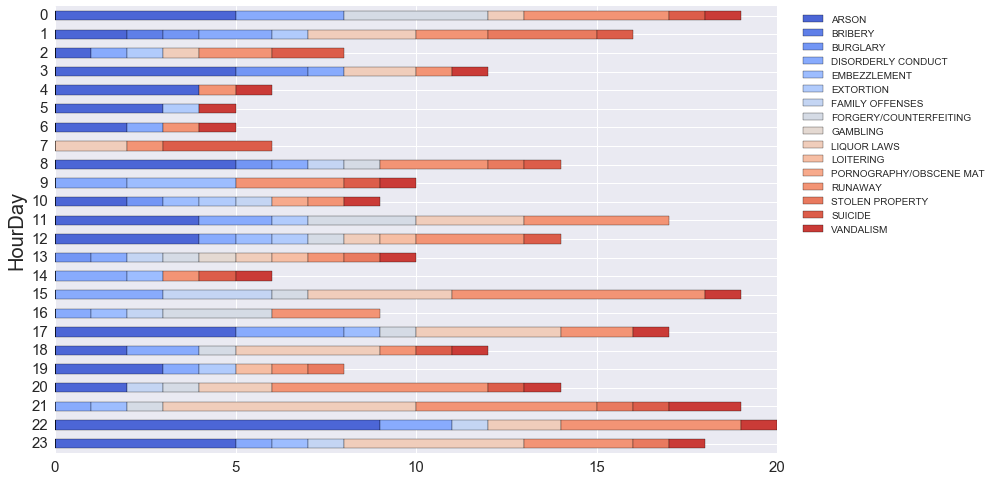

In [184]:
crime_type_hour = sf[["HourDay","Category"]]#.pivot_table(index="HourDay", columns="Category", aggfunc=lambda x: len(x.unique()))
sns.set_palette(sns.color_palette("coolwarm", crime_type_hour.Category.cat.categories.size))
crtb = pd.crosstab(crime_type_hour.Category, crime_type_hour.HourDay).dropna()
more = crtb[crtb > 10].dropna(thresh=24)
sns.set_palette(sns.color_palette("coolwarm", more.index.size))
more.T.sort_index(ascending=False).plot(kind="barh", stacked=True,)
plt.legend(bbox_to_anchor=(1.2, 1.0));

plt.figure();
less = crtb[crtb <= 10].dropna(thresh=24)
sns.set_palette(sns.color_palette("coolwarm", less.index.size))
less.T.sort_index(ascending=False).plot(kind="barh", stacked=True)
plt.legend(bbox_to_anchor=(1.3, 1.0))


Here is noted that the most common crime is the LANCERY/THEAF (as expected), and are more common in the late night and much less common in the morning. The same are for the crimes with less or equal than 10 ocurrences, but some crimes of these crimes occurs also in the late morning and evening (7AM to 1PM), like RUNAWAY and LIQUOUR LAWS; it's expected because these type of crimes does not correlate with time (means, the crime develops at any time).

#### By day of week

C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


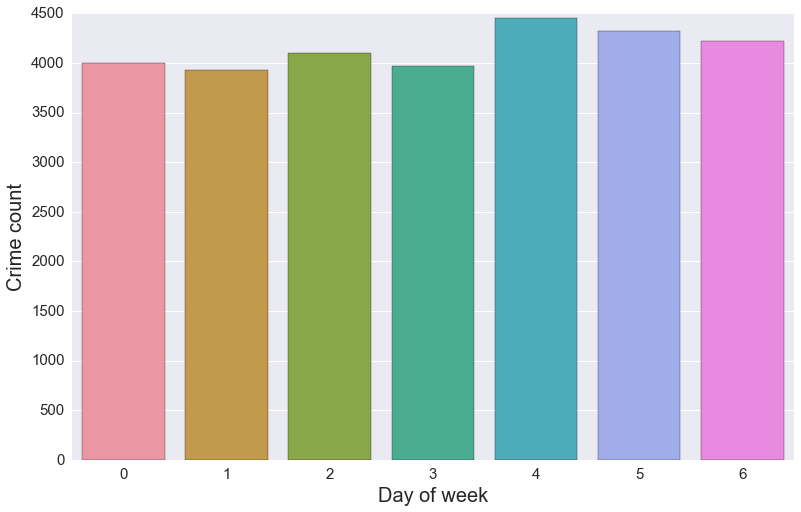

In [190]:
sns.countplot(x=sf.Timestamp.dt.dayofweek, order=range(0,7))
plt.xlabel("Day of week")
plt.ylabel("Crime count");

Noted, that the crimes were developed in uniform way the days of the week

#### By day of week and type of crime
Two plots, one with more than 20 crimes by day of week and type, and the other less than 20 crimes.

C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


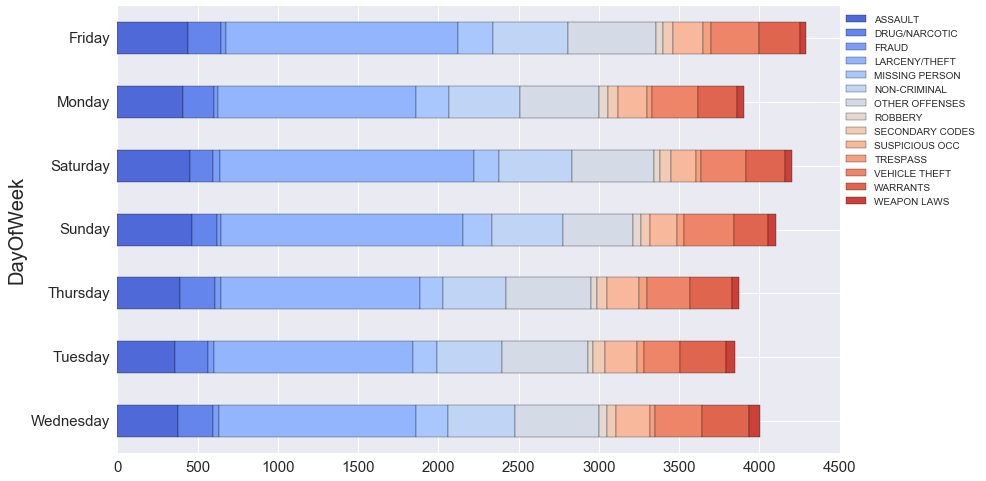

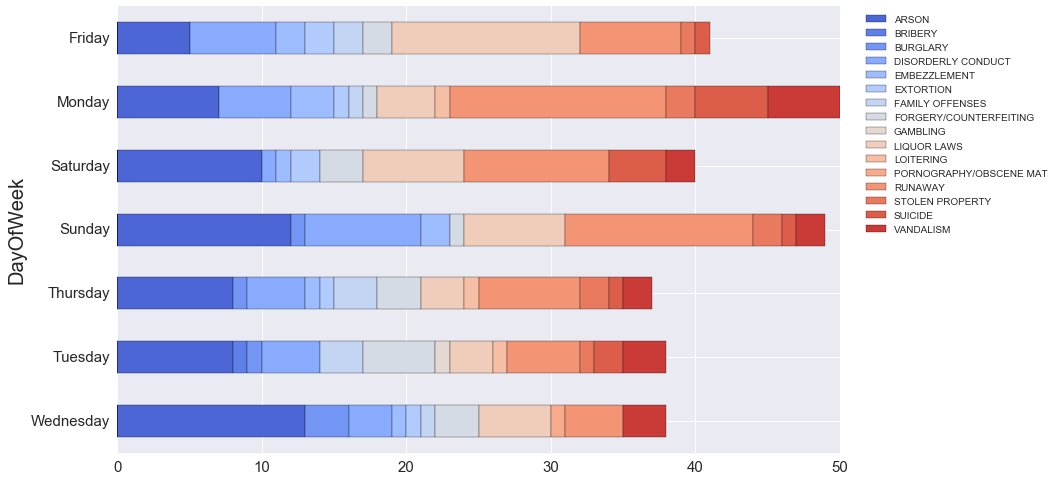

In [193]:
crime_type_week = sf[["DayOfWeek","Category"]]
crtb = pd.crosstab(crime_type_week.Category, crime_type_week.DayOfWeek).dropna()
more = crtb[crtb > 20].dropna(thresh=7)
sns.set_palette(sns.color_palette("coolwarm", more.index.size))
more.T.sort_index(ascending=False).plot(kind="barh", stacked=True,)
plt.legend(bbox_to_anchor=(1.2, 1.0));

plt.figure();
less = crtb[crtb <= 20].dropna(thresh=7)
sns.set_palette(sns.color_palette("coolwarm", less.index.size))
less.T.sort_index(ascending=False).plot(kind="barh", stacked=True)
plt.legend(bbox_to_anchor=(1.3, 1.0))

#### By month

C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


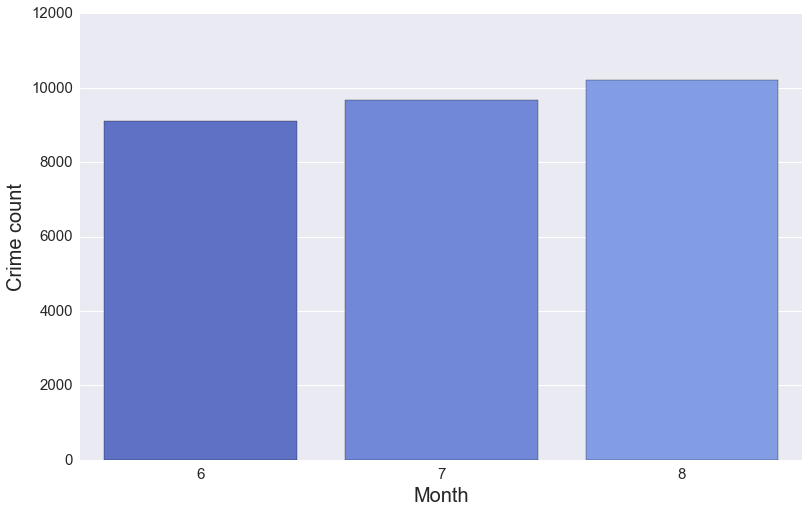

In [156]:
sns.countplot(x=sf.Timestamp.dt.month, order=range(6,9))
plt.xlabel("Month")
plt.ylabel("Crime count");

As you can see, the crimes count almost don't change month to month. Nevertheless, there is a linear increasing (if you want to plot it). It can be meaningless

### Count of crimes by district

#### Without the type of crime

C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


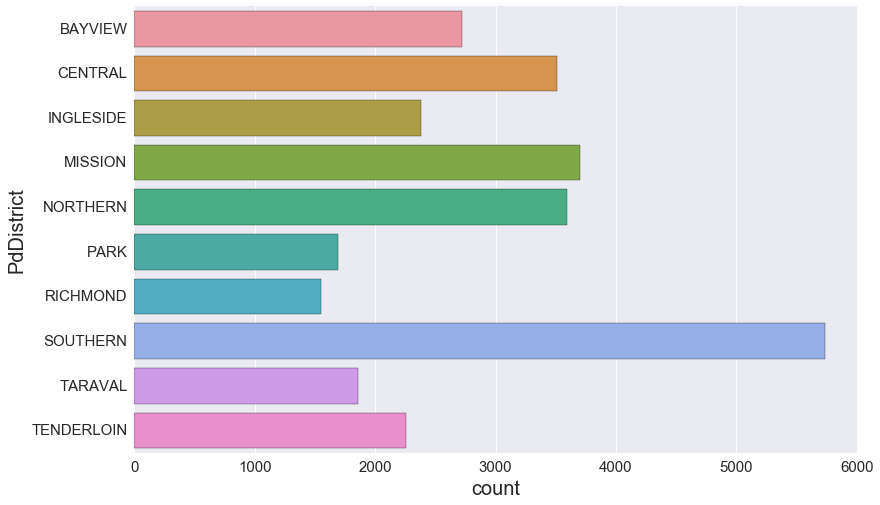

In [167]:
sns.set_palette(sns.color_palette("pastel"))
sns.countplot(data=sf, y="PdDistrict");

#### With the type of crime specified

C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


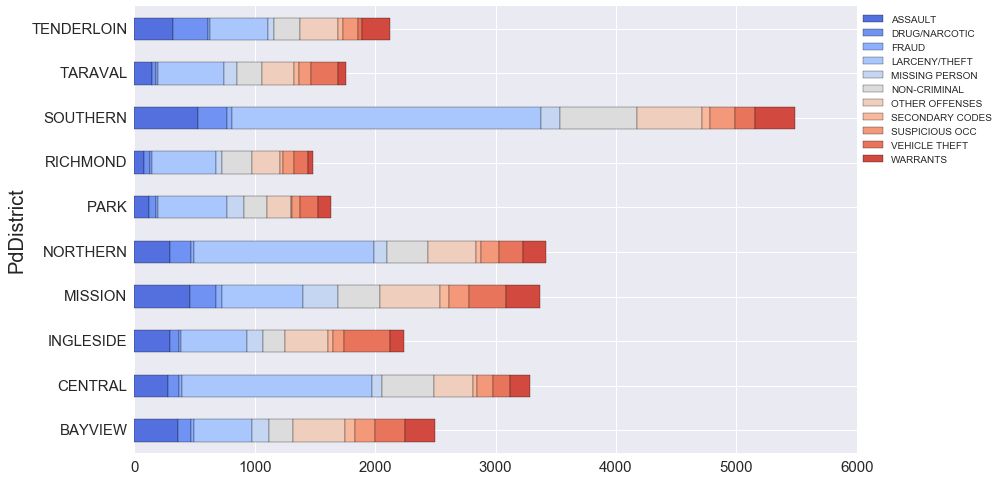

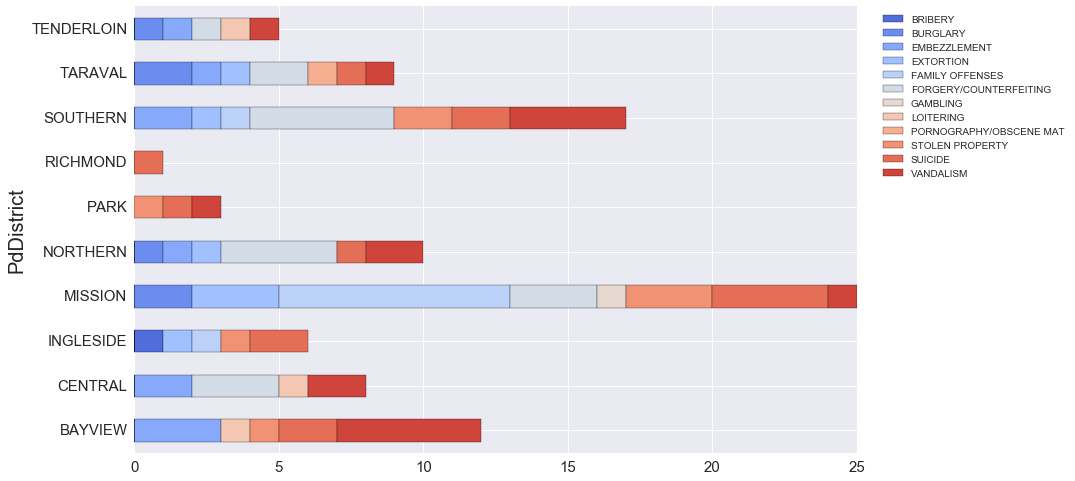

In [182]:
crime_type_district = sf[["PdDistrict","Category"]]

crtb = pd.crosstab(crime_type_district.Category, crime_type_district.PdDistrict).dropna()
more = crtb[crtb > 10].dropna(thresh=10)
sns.set_palette(sns.color_palette("coolwarm", more.index.size))
more.T.plot(kind="barh", stacked=True)
plt.legend(bbox_to_anchor=(1.2, 1.0));

plt.figure();
less = crtb[crtb <= 10].dropna(thresh=10)
sns.set_palette(sns.color_palette("coolwarm", less.index.size))
less.T.plot(kind="barh", stacked=True)
plt.legend(bbox_to_anchor=(1.3, 1.0))


Only in the BAYVIEW, the LARCERY/THIEF crimes are not the most common type of crime. In that place, OTHER OFFENCES crimes are also common. It is not know if that have a explanation, because OTHER OFFENCES is a vague classification.

## Seattle crimes
Now the analysis for Seattle crimes

In [194]:
raw_data_st = pd.read_csv("./seattle_incidents_summer_2014.csv")
raw_data_st.info()
raw_data_st.iloc[:3,:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32779 entries, 0 to 32778
Data columns (total 19 columns):
RMS CDW ID                           32779 non-null int64
General Offense Number               32779 non-null int64
Offense Code                         32779 non-null object
Offense Code Extension               32779 non-null int64
Offense Type                         32779 non-null object
Summary Offense Code                 32779 non-null object
Summarized Offense Description       32779 non-null object
Date Reported                        32779 non-null object
Occurred Date or Date Range Start    32779 non-null object
Occurred Date Range End              16499 non-null object
Hundred Block Location               32779 non-null object
District/Sector                      32722 non-null object
Zone/Beat                            32723 non-null object
Census Tract 2000                    32645 non-null float64
Longitude                            32779 non-null float64
Latitud

C:\Users\sadeus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014


The data to be analysed has few features, because this dataset have a lot of reducances. For example, the category of crime is created by spliting the values of Offence Type by the hyphen (-); the the Offence Type is droped. Then the columns names are lowercased and the spaces replaced by lower hyphens (_)_. The dates are all keeped, because it can be possible to plot the timespan of the crimes

In [279]:
st = raw_data_st.copy()
st.drop(["General Offense Number","Offense Code","Offense Code Extension","Summarized Offense Description", "Location",
         "Summary Offense Code", "Hundred Block Location", 
         "Census Tract 2000"], axis=1, inplace=True)

st["Date Reported"] = pd.to_datetime(st["Date Reported"])
st.rename(columns={'Occurred Date or Date Range Start': 'Date Start', 'Occurred Date Range End': 'Date End'}, inplace=True)
st.columns = st.columns.str.strip().str.lower().str.replace(' ', '_')


st["category"] = st["offense_type"].str.split("-").str[0]
print(st.info())
st.drop(["offense_type"],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32779 entries, 0 to 32778
Data columns (total 12 columns):
rms_cdw_id         32779 non-null int64
offense_type       32779 non-null object
date_reported      32779 non-null datetime64[ns]
date_start         32779 non-null object
date_end           16499 non-null object
district/sector    32722 non-null object
zone/beat          32723 non-null object
longitude          32779 non-null float64
latitude           32779 non-null float64
month              32779 non-null int64
year               32779 non-null int64
category           32779 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 3.0+ MB
None


## Count by time period

### By hour of day

C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


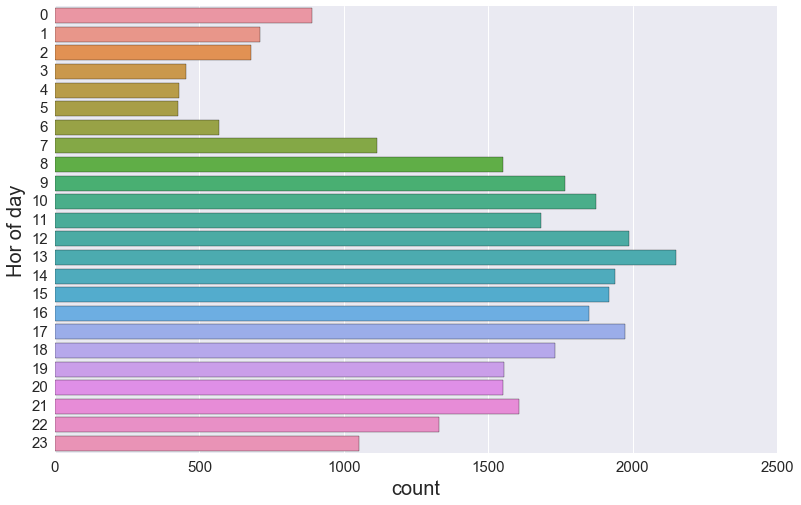

In [277]:
sns.set_palette(sns.color_palette("pastel"))
sns.countplot(y=st.date_reported.dt.hour, order=range(0,24));
plt.ylabel("Hor of day");

## Count by type of crime
The plot is sort by count. It must be used a unique value to make the sort

C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\sadeus\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


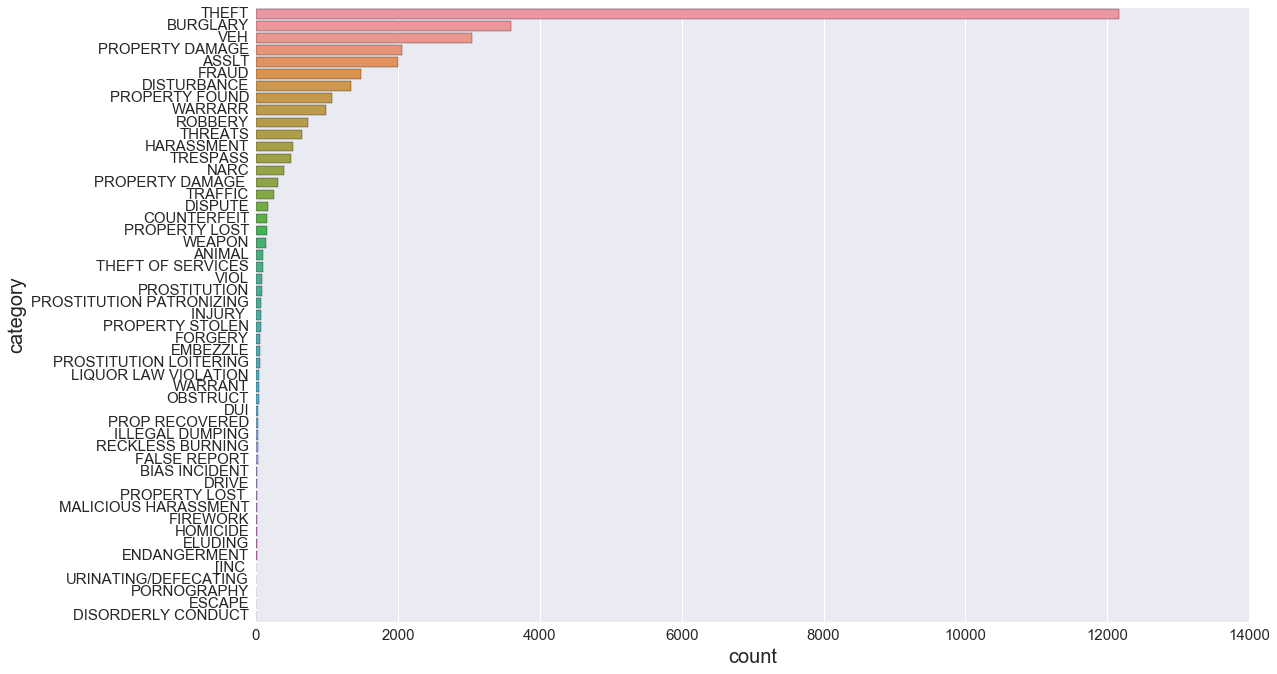

In [257]:
plt.figure(figsize=(11*(1+np.sqrt(5))/2,11))
sns.set_palette(sns.color_palette("pastel"))
ordVal = st.groupby("category")["rms_cdw_id"].describe().unstack().sort([('count')], ascending=False).index.values
sns.countplot(data=st, y="category", order=ordVal);

### Count of crimes by district/sector

C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


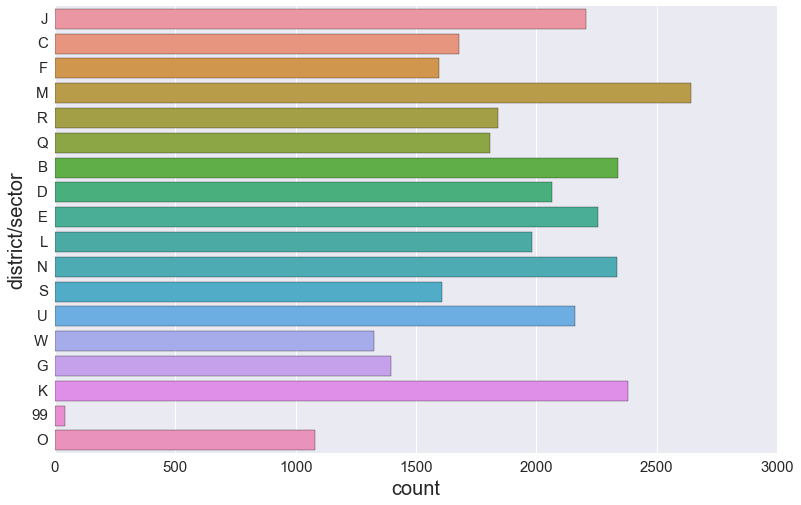

In [281]:
sns.set_palette(sns.color_palette("pastel"))
sns.countplot(data=st, y="district/sector");

## Inter city comparizon

### Count of crimes by type, weighted by the population of each city

Population of each city taken from [Wikipedia](http://en.wikipedia.org)

In [276]:
n_st = 608660 ## Seattle 
n_sf = 852469 ## San Francisco

C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\sadeus\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
C:\Users\sadeus\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


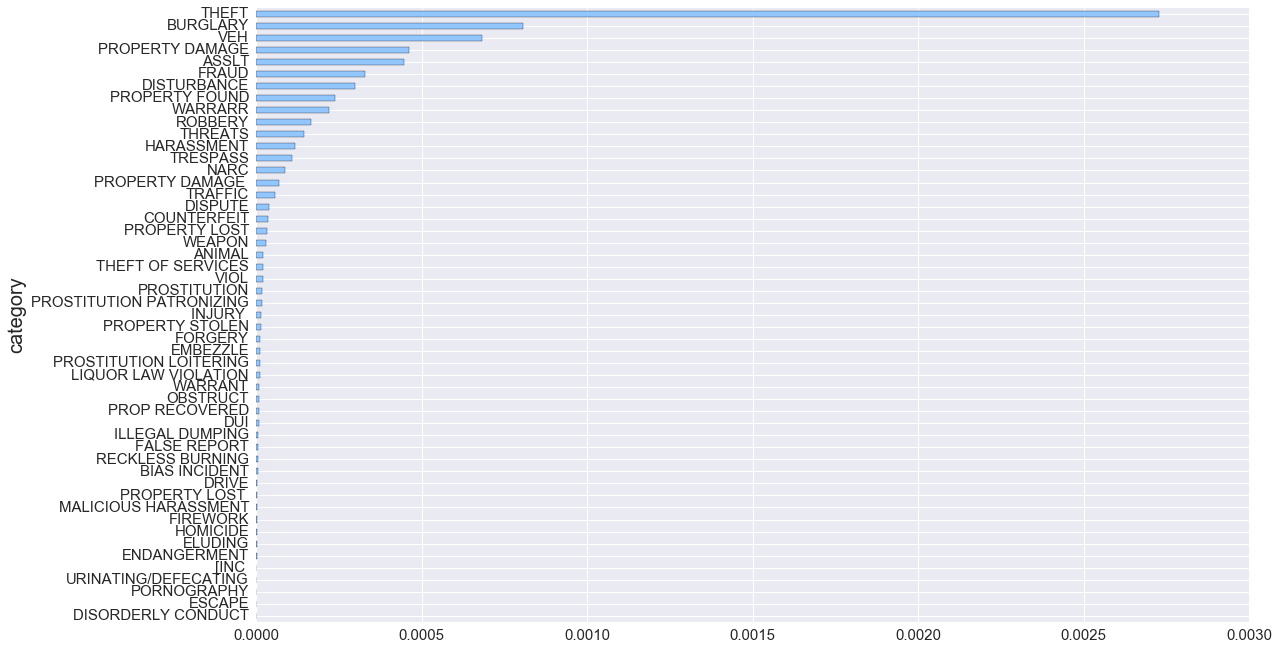

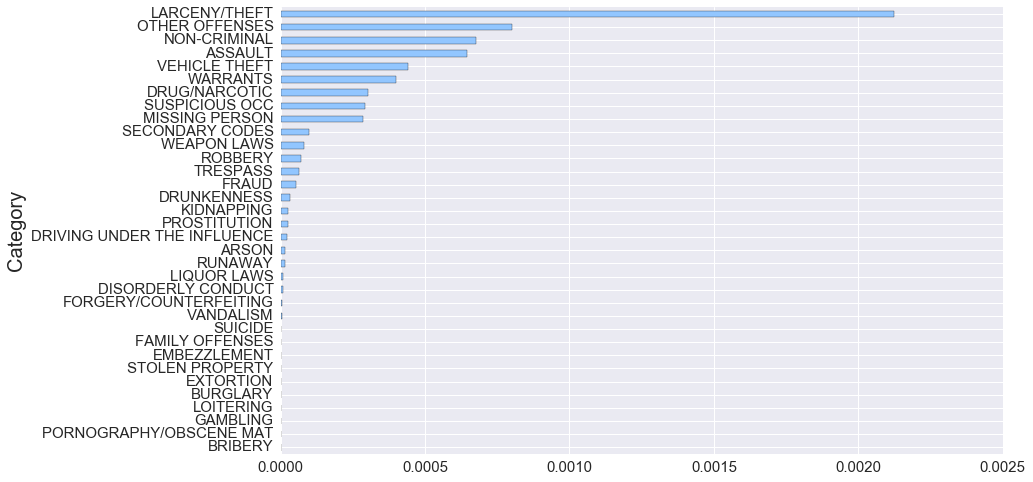

In [274]:
plt.figure(figsize=(11*(1+np.sqrt(5))/2,11))
sns.set_palette(sns.color_palette("pastel"))
ordVal = st.groupby("category")["rms_cdw_id"].describe().unstack().sort([('count')], ascending=False).index.values
(st.groupby("category")["rms_cdw_id"].count().sort_values(ascending=True) / n_st).plot(kind="barh")

plt.figure()
ordVal = sf.groupby("Category")["PdId"].describe().unstack().sort([('count')], ascending=False).index.values
(sf.groupby("Category")["PdId"].count().sort_values(ascending=True) / n_st).plot(kind="barh")

As an amount of crimes per capita, Seattle has more THEFT crimes than San Francisco. In total, is shown that Seattle is a more dangerous city